In [1]:
import requests
import zipfile
import pathlib
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tarfile

try:
    from PIL import Image
except:
    print (f'[INFO] Couldn\'t find pillow installed...... Installing it')
    !pip3 install -q pillow
    from PIL import Image

#importing machine learning moudules and libraries

try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1])>=12
    assert int(torch.__version__.split(".")[1])>=13
    print(f'torch version: {torch.__version__}')
    print(f" torchvision version: {torchvision.__version__}")
except:
  print(f"torch version not up to date....... Installing updated version \n")
  print(f"torchvision version not up to date........ Installing the updated version")
  !pip3 install -U torch, torchvision, torchaudion --extra-index-url https://download.pytorch.org/whl/cu112
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

from torchvision import datasets, transforms
from torch.utils import tensorboard
from torch.utils.data import DataLoader
from torch import nn

try:
    from torchinfo import summary
except:
    print(f'[INFO] torchinfo not installed....installing')
    !pip install -q torchinfo
    from torchinfo import summary



torch version not up to date....... Installing updated version 

torchvision version not up to date........ Installing the updated version
ERROR: Invalid requirement: 'torch,'
torch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118
[INFO] torchinfo not installed....installing


In [2]:
# Get training data
data_download = pathlib.Path("/content/data")
train_data = datasets.Food101(root=data_download,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_download,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [03:54<00:00, 21264792.14it/s]


Extracting /content/data/food-101.tar.gz to /content/data


In [3]:
# normal method of downloading a tarfile and unzipping it

'''import tarfile
data_dir = pathlib.Path("/content/data")

# Create the directory if it doesn't exist
data_dir.mkdir(parents=True, exist_ok=True)

url = "https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
response = requests.get(url)

if response.status_code == 200:
    # Write the content to the tar.gz file
    with open(data_dir / 'images.tar.gz', 'wb') as f:
        f.write(response.content)

    # Extract the contents of the tar.gz file
    with tarfile.open(data_dir / 'images.tar.gz', 'r:gz') as tar_file:
        tar_file.extractall(data_dir)
else:
    print("Failed to download the file.")

print("Extraction completed.")'''

'import tarfile\ndata_dir = pathlib.Path("/content/data")\n\n# Create the directory if it doesn\'t exist\ndata_dir.mkdir(parents=True, exist_ok=True)\n\nurl = "https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"\nresponse = requests.get(url)\n\nif response.status_code == 200:\n    # Write the content to the tar.gz file\n    with open(data_dir / \'images.tar.gz\', \'wb\') as f:\n        f.write(response.content)\n\n    # Extract the contents of the tar.gz file\n    with tarfile.open(data_dir / \'images.tar.gz\', \'r:gz\') as tar_file:\n        tar_file.extractall(data_dir)\nelse:\n    print("Failed to download the file.")\n\nprint("Extraction completed.")'

In [4]:
"""
Define a function that downloads the data and opens the zip file that contains the data
"""
data_path = "/content/data"
image_path = '/content/data/pizza_steak_sushi_tacos'

'''def get_data(data_path: str = None, image_path: str = None, url: str = None):
    """
    Download a file from a URL and extract its contents to a specified directory.

    Args:
        data_path (str, optional): The directory where the file will be saved and extracted.
                                  If not provided, the current working directory is used.
        image_path (str, optional): The name of the file to be saved and extracted.
                                    If not provided, a default name will be used.
        url (str, optional): The URL from which the file will be downloaded.

    Raises:
        ValueError: If both `data_path` and `url` are None.
    """
    if data_path is None and url is None:
        raise ValueError("Both data_path and url cannot be None.")

    if image_path is not None and not image_path.endswith('.tar.gz'):
        image_path += '.tar.gz'

    data_dir = pathlib.Path(data_path) if data_path else pathlib.Path.cwd()
    img_dir = pathlib.Path(data_dir) / image_path

    # Create the directory if it doesn't exist
    img_dir.parent.mkdir(parents=True, exist_ok=True)

    if url is not None:
        response = requests.get(url)

        if response.status_code == 200:
            # Write the content to the tar.gz file
            with open(img_dir, 'wb') as f:
                f.write(response.content)

            # Extract the contents of the tar.gz file
            with tarfile.open(img_dir, 'r:gz') as tar_file:
                tar_file.extractall(data_dir)
        else:
            print(f"Failed to download the file from {url}")

    print("Extraction completed.")

try:
    get_data(data_path=data_path, image_path="image_path", url="https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz")
except Exception as e:
    print(f"Exception: {e}")
'''

'def get_data(data_path: str = None, image_path: str = None, url: str = None):\n    """\n    Download a file from a URL and extract its contents to a specified directory.\n\n    Args:\n        data_path (str, optional): The directory where the file will be saved and extracted.\n                                  If not provided, the current working directory is used.\n        image_path (str, optional): The name of the file to be saved and extracted.\n                                    If not provided, a default name will be used.\n        url (str, optional): The URL from which the file will be downloaded.\n\n    Raises:\n        ValueError: If both `data_path` and `url` are None.\n    """\n    if data_path is None and url is None:\n        raise ValueError("Both data_path and url cannot be None.")\n\n    if image_path is not None and not image_path.endswith(\'.tar.gz\'):\n        image_path += \'.tar.gz\'\n\n    data_dir = pathlib.Path(data_path) if data_path else pathlib.Path.cwd()\

In [5]:
'''data_path = pathlib.Path(data_path)
image_path = pathlib.Path(image_path)'''

'data_path = pathlib.Path(data_path)\nimage_path = pathlib.Path(image_path)'

In [6]:
'''#the same function but for a zip file instead
import zipfile

def get_data(data_path: str = None, image_path: str = None, url: str = None):
    """
    Download a file from a URL and extract its contents to a specified directory.

    Args:
        data_path (str, optional): The directory where the file will be saved and extracted.
                                  If not provided, the current working directory is used.
        image_path (str, optional): The name of the file to be saved and extracted.
                                    If not provided, a default name will be used.
        url (str, optional): The URL from which the file will be downloaded.

    Raises:
        ValueError: If both `data_path` and `url` are None.
    """
    if data_path is None and url is None:
        raise ValueError("Both data_path and url cannot be None.")

    if image_path is not None and not image_path.endswith('.zip'):
        image_path += '.zip'

    data_dir = pathlib.Path(data_path) if data_path else pathlib.Path.cwd()
    img_dir = pathlib.Path(data_dir) / image_path

    # Create the directory if it doesn't exist
    img_dir.parent.mkdir(parents=True, exist_ok=True)

    if url is not None:
        response = requests.get(url)

        if response.status_code == 200:
            # Write the content to the zip file
            with open(img_dir, 'wb') as f:
                f.write(response.content)

            # Extract the contents of the zip file
            with zipfile.ZipFile(img_dir, 'r') as zip_file:
                zip_file.extractall(data_dir)
        else:
            print(f"Failed to download the file from {url}")

    print("Extraction completed.")

try:
    get_data(data_path="/content/", image_path="images.zip", url="https://example.com/example.zip")
except Exception as e:
    print(f"Exception: {e}")
'''

'#the same function but for a zip file instead\nimport zipfile\n\ndef get_data(data_path: str = None, image_path: str = None, url: str = None):\n    """\n    Download a file from a URL and extract its contents to a specified directory.\n\n    Args:\n        data_path (str, optional): The directory where the file will be saved and extracted.\n                                  If not provided, the current working directory is used.\n        image_path (str, optional): The name of the file to be saved and extracted.\n                                    If not provided, a default name will be used.\n        url (str, optional): The URL from which the file will be downloaded.\n\n    Raises:\n        ValueError: If both `data_path` and `url` are None.\n    """\n    if data_path is None and url is None:\n        raise ValueError("Both data_path and url cannot be None.")\n\n    if image_path is not None and not image_path.endswith(\'.zip\'):\n        image_path += \'.zip\'\n\n    data_dir = pa

In [7]:

# Get random 10% of training images
import random

# Setup data paths
data_path1 = data_download / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi", "tacos"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.2

# Create function to separate a random amount of data
def get_subset(image_path=data_path1,
               data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi","tacos"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_download / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)

[INFO] Creating image split for: train...
[INFO] Getting random subset of 600 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 200 images for test...


In [8]:
# Create target directory path
target_dir_name = f"/content/data/pizza_steak_sushi_tacos_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '/content/data/pizza_steak_sushi_tacos_20_percent'


In [9]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying /content/data/food-101/images/tacos/2746697.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/tacos/2746697.jpg...
[INFO] Copying /content/data/food-101/images/pizza/3269634.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/pizza/3269634.jpg...
[INFO] Copying /content/data/food-101/images/pizza/1524655.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/pizza/1524655.jpg...
[INFO] Copying /content/data/food-101/images/steak/2825100.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/steak/2825100.jpg...
[INFO] Copying /content/data/food-101/images/steak/225990.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/steak/225990.jpg...
[INFO] Copying /content/data/food-101/images/steak/1839481.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/steak/1839481.jpg...
[INFO] Copying /content/data/food-101/images/pizza/38349.jpg to /content/data/pizza_steak_sushi_tacos_20_percent/train/pizza/38349.jpg...
[INFO] Copyi

In [10]:
# Setup train and testing paths
train_dir = target_dir / "train"
test_dir = target_dir / "test"

train_dir, test_dir

(PosixPath('/content/data/pizza_steak_sushi_tacos_20_percent/train'),
 PosixPath('/content/data/pizza_steak_sushi_tacos_20_percent/test'))

In [11]:
data_path = data_download
image_path = target_dir
image_path

PosixPath('/content/data/pizza_steak_sushi_tacos_20_percent')

Random image path: /content/data/pizza_steak_sushi_tacos_20_percent/train/pizza/1512514.jpg
Image class: pizza
Image height: 512
Image width: 512


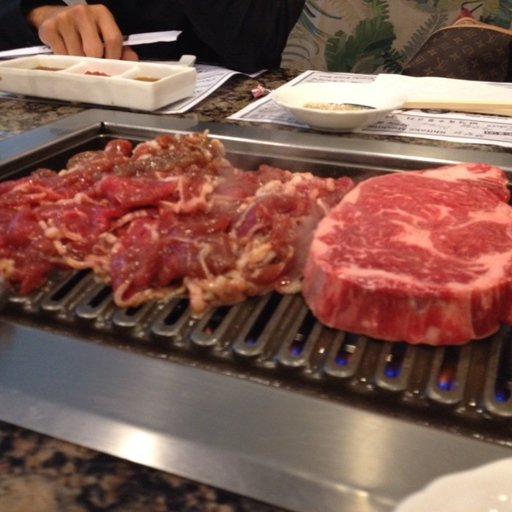

In [12]:
'''
write a code that plots images and displays their height and size
using the PIL library
'''
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [13]:
'''
Ploting the same using matplotlib and numpy
'''
'''# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

'''

'# Turn the image into an array\nimg_as_array = np.asarray(img)\n\n# Plot the image with matplotlib\nplt.figure(figsize=(10, 7))\nplt.imshow(img_as_array)\nplt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")\nplt.axis(False);\n\n'

In [14]:
#manual transform function

def manual_transform(shape: tuple, mean: list = None, std: list = None, p=None):
    """ This function manually transforms the image based on the arguments entered
    Args:
        shape: data format is a tuple i.e., (shape=(123, 123)) this determines the new shape after transforms.Resize
        mean: of the form [0.5, 0.5, 0.5] specifies the mean for transforms.Normalize
        std: of the form [0.5, 0.5, 0.5] specifies the std for transforms.Normalize
        p: specified as a float, is the p value used for transforms.RandomHorizontalFlip
    """
    try:
        transform_list = [transforms.Resize(size=shape), transforms.ToTensor()]

        if p is not None:
            transform_list.append(transforms.RandomHorizontalFlip(p=p))

        if mean is not None and std is not None:
            transform_list.append(transforms.Normalize(mean=mean, std=std))

        composed_transform = transforms.Compose(transform_list)
        return composed_transform

    except Exception as e:
        print(f"Error occurred: {str(e)}")

# Example usage:
# transform = manual_transform((123, 123), mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], p=0.5)


In [15]:
shape = (64, 64)
data_transform= manual_transform(shape, p=0.5)

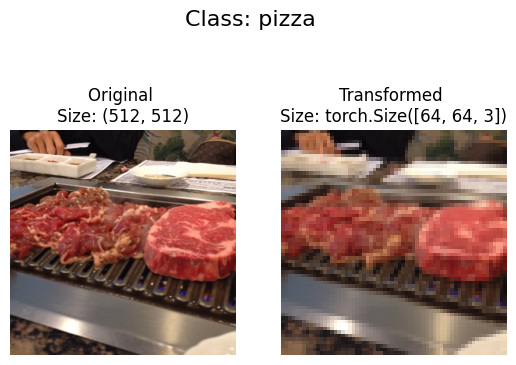

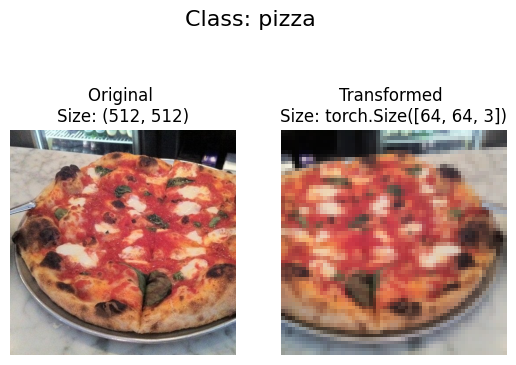

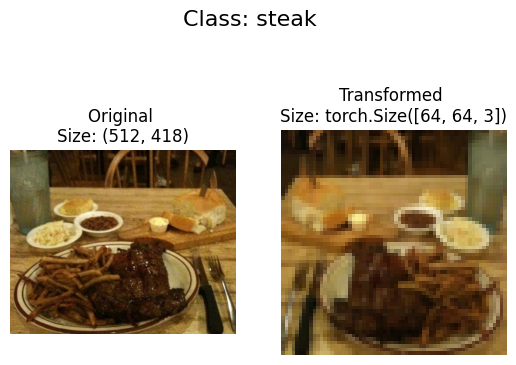

In [16]:
# plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)


In [17]:
#getting the class name from the directory
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: /content/data/pizza_steak_sushi_tacos_20_percent/train
Class names found: ['pizza', 'steak', 'sushi', 'tacos']


In [18]:
# build a function that returns classes and a dict of class mapped to ids
from typing import List, Tuple, Dict
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [19]:
# try function
find_classes(train_dir)

(['pizza', 'steak', 'sushi', 'tacos'],
 {'pizza': 0, 'steak': 1, 'sushi': 2, 'tacos': 3})

In [20]:
#Defining a custom ImageFolder class by subclasing torch.utils.data.Datasets
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [21]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=data_transform)
train_data_custom

In [22]:
class_names = train_data_custom.classes
B = train_data_custom.class_to_idx
class_names, B

(['pizza', 'steak', 'sushi', 'tacos'],
 {'pizza': 0, 'steak': 1, 'sushi': 2, 'tacos': 3})

In [23]:
#Define a function to display random images from a pytorch Dataset object
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

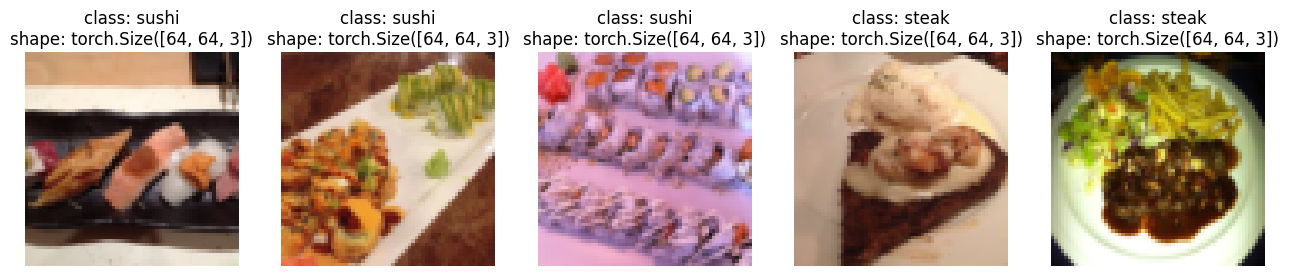

In [24]:
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [32]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

Creating Dataloaders for the model building part.

In [35]:
simple_transform = manual_transform(shape)
train_data_simple = datasets.ImageFolder(train_dir, simple_transform)
test_data_simple =datasets.ImageFolder(test_dir, simple_transform)
BATCH_SIZE = 32
NUM_WORKERS =os.cpu_count()
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS
                                     )

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers = NUM_WORKERS)
train_dataloader_simple, test_dataloader_simple

AttributeError: ignored

**MODEL DEVELOPMENT**
* Develop a VGG16 model
* Develop a VIT
* set the logdir and display using tensorboard
* write 2 models using transfer learning
* compare their performance
* deploy one of them

In [26]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [27]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [28]:
#create a writer function

def create_writer(experiment_name:str,
                  model_name:str,
                  extra: str = None) ->torch.utils.tensorboard.writer.SummaryWriter():
    """creates a torch.utils.tensorboard.writer.SummaryWriter() instance
    log_dir is a combination of runs/timestamp/experiment_name/model_name/extra.

    timestamp is in the YYYY-MM-DD format

    Args:
        experiment_name(str): Name of experiment
        model_name(str): name of the model
        extra(str, optional):anything else

    Returns:
        torch.utils.tensorboard.writer.SummaryWriter(): instance.
    Example usage:
        Create a writer saving to "runs/2022-06-04/data_10_percent/effnetb2/5_epochs/"
        writer = create_writer(experiment_name="data_10_percent",
                               model_name="effnetb2",
                               extra="5_epochs")
        # The above is the same as:
        writer = SummaryWriter(log_dir="runs/2022-06-04/data_10_percent/effnetb2/5_epochs/")

    """
    from datetime import datetime
    import os

    timestamp = datetime.now().strftime('%Y-%m-%d')

    if extra:
        log_dir = os.path.join("runs", timestamp, experiment_name, model_name, extra)
    else:
        log_dir = os.path.join("runs",timestamp, experiment_name, model_name)

    print(f"[INFO] created SummaryWriter, saving to: {log_dir}...")
    return SummaryWriter(log_dir =log_dir)


In [29]:
def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = pathlib.Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

In [30]:
class smallVGG(nn.Module):
  """
  small sized VGG model, subclassing nn.Module
  """
  def __init__(self, input_shape: int, hidden_unit: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
           nn.Conv2d(input_shape,
                     hidden_unit,
                     3,
                     padding = 1),
           nn.ReLU(),
           nn.Conv2d(hidden_unit,
                     hidden_unit,
                     3,
                     padding = 1),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size = 2,
                        stride = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_unit,
                      hidden_unit,
                      3,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_unit,
                      hidden_unit,
                      3,
                      padding = 1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(2)

        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_unit*16*16,
                      out_features = output_shape)
        )
  def forward (self, x: torch.Tensor):
          x = self.conv_block_1(x)
          print(x.shape)
          x = self.conv_block_2(x)
          print(x.shape)
          x = self.classifier(x)
          print(x)
          return x
          #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model_0 = smallVGG(input_shape = 3, #number of color channels
                   hidden_unit = 10,
                   output_shape = len(train_data_custom.classes)).to(device)

model_0

smallVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=4, bias=True)
  )
)

In [31]:
# getting one image sample from the dataloader object batch

img_batch, label_batch = next(iter(train_dataloader_simple))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0] #we unsqueeze to fit the model

print(f"Image shape is: {img_single.shape}")

# begin the model evaluation code
model_0.eval()

with torch.inference_mode():
  pred = model_0(img_single).to(device)

print(f"Output logits:\n{pred}\n")
print(f"Output predicted probabilities: {torch.softmax(pred, dim=1)}\n")
print(f"Output predicted labels: {torch.argmax(torch.softmax(pred, dim=1), dim=1)}")
print(f"Actual label: {label_single}")



Image shape is: torch.Size([1, 3, 64, 64])


RuntimeError: ignored

In [ ]:
#using torchinfo to pull out the model summary
summary(model_0,[1, 3, 64, 64])

In [ ]:
# Creating a training loop for training our model
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device) -> Tuple[float, float]:

  '''defines the model training step
  Args:
      model: a torch.nn.Module object
      dataloader: a torch.utils.data.DataLoader object
      optimizer: a torch.optim.Optimizer object
  Return:
      train_loss: accumulated loss over the batches
      train_acc:  accuracy value of the model
  Raises:
      ValueError: if model is None.

  '''
  if model is None:
    raise ValueError("no model to work with")
  # putting the model in training mode
  model.train()

  #initializing the training loss and accuracy values
  train_loss, train_acc = 0,0

  #loop through dataloader data batches
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)


    #put in prediction mode
    y_pred =model(X)

    #calculate and accumulate the loss function
    loss = loss_func(y_pred, y)
    train_loss += loss.item() #accumulate the loss

    #zero_grad is used to clear the accumulated loss before proceeding to the new batch
    optimizer.zero_grad()

    #backward
    loss.backward()

    #step optimizes per batch
    optimizer.step()

    #calculate the class and accumulate the loss for accuracy
    y_pred_classes = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_classes == y).sum().item()/len(y_pred)

  #divide the train loss and acc by the length of the data loader

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc



In [ ]:
from torch.cuda.random import device_count
# Creating a testing loop for testing the performance of our model
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_func: torch.nn.Module,
              device: torch.device = device):
  #put model in evaluation mode
  model.eval()

  #initialize test loss and accuracy

  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      #send to device
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      #calculate and accumulate the loss function
      loss = loss_func(test_pred_logits, y)
      test_loss += loss.item()

      #calculate and accumulate accuracy

      test_pred_labels = torch.argmax(test_pred_logits, dim=1)
      test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

      #divide by length of the dataloader

      test_loss = test_loss / len(dataloader)
      test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

In [ ]:
#creating a train function that combines the train_step and test_step functions
# tqdm module will help us keep track of the number of training epoch
from  tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_func:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =10,
          device: torch.device =device,
          writer: torch.utils.tensorboard.writer.SummaryWriter =None
          ):

  #creating empty dictionaries to store your results
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }

  #loop through epoch for the train and test step
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_func = loss_func,
                                       optimizer = optimizer)
    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_func = loss_func)

    #print out what's happening
    print(f'Epochs: {epoch+1} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} |'
          f'test_loss: {test_loss:.4f}  | test_acc: {test_acc:.4f}')

    #update results

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    #add writer code
    if writer:
      writer.add_scalars(main_tag = 'Loss',
                         tag_scalar_dict ={'train_loss': train_loss,
                                           "test_loss": test_loss},
                         global_step =epoch)

      writer.add_scalars(main_tag="Accuracy",
                         tag_scalar_dict ={"train_acc": train_acc,
                                           "test_acc":test_acc},
                         global_step = epoch)
      writer.close()
    else:
      pass

  return results



In [ ]:
def manual_seed (seed: int):
  if device == 'cuda':
    torch.cuda.manual_seed(seed)
  else:
    torch.manual_seed(seed)



In [ ]:
#setup the train and evaluation

manual_seed(42)
NUM_EPOCHS = 10

model_0 = smallVGG(input_shape = 3,
                   hidden_unit = 10,
                   output_shape = len(train_data_custom.classes)).to(device)

#setup the optimizer and loss function

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr=0.001)

# start our timer
from timeit import default_timer as timer

start_time = timer()
experiment_name_vgg = 'experiment 1'
model_name_vgg = 'small_VGG'
# bring in the train
mode_0_results = train(model =  model_0,
                       train_dataloader = train_dataloader_simple,
                       test_dataloader  = test_dataloader_simple,
                       optimizer = optimizer,
                       loss_func = loss_func,
                       epochs = NUM_EPOCHS,
                       writer = create_writer(experiment_name = experiment_name_vgg,
                                              model_name = model_name_vgg,
                                              extra = f"{NUM_EPOCHS}_epochs")

                       )

end_time = timer()

save_filepath_vgg =f"01_{model_name_vgg}_{experiment_name_vgg}_{NUM_EPOCHS}_epochs.pth"
save_model(model = model_0,
           target_dir ="models",
           model_name = save_filepath_vgg)

print(f"Total training time: {start_time-end_time:.3f}")

In [ ]:
from IPython.lib.display import DisplayObject
from torch._C import DisableTorchFunctionSubclass
from typing import List, Tuple, Dict
# we can see what output our train step returns by running:
# model_0_results.keys()

#at this point we'll define our plot loss curve function
def plot_loss_curves(results: Dict[str, List[float]]):
  """plots the training curves from the results dictionary

  Args:
      results (dict): dictionary that contain a list of result values
            e.g.,{"train_loss":[...],
                  'train_acc': [...],
                  'test_loss': [...],
                  'test_acc':  [...]}

  """

  train_loss = results["train_loss"]
  test_loss  = results["test_loss"]

  train_acc  = results["train_acc"]
  test_acc   = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize = (15, 7))

  #loss curve
  plt.subplot(1, 2, 1) # (1, 2, 1): 1-rows, 2-column 1-positioned leftmost
  plt.plot(epochs, train_loss, label = 'train_loss')
  plt.plot(epochs, test_loss, label = 'test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy

  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_acc, label = 'train_accuracy')
  plt.plot(epochs, test_acc,  label = 'test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();









In [ ]:
plot_loss_curves(mode_0_results)

## Now let's define a ViT from scratch without using any pytorch inbuilt function.


In [ ]:
#Let's define a vit from scratch
# Let's start by calculating the patch embedding and shapes by hand

height = 224
width = 224
color_channels = 3
patch_size =16

number_of_patches = int(height * width) / patch_size**2

print(f'Number of patches with image height (H = {height}), width (W = {width}) has (N = {number_of_patches}) ')

In [ ]:
transform1 = manual_transform((224, 224))
train_data1 = datasets.ImageFolder(train_dir, transform1)

train_dataloader1 = DataLoader(train_data1,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS
                                     )

img_batch1, label_batch1 = next(iter(train_dataloader1))
image = img_batch1[5]
img_unsqueeze = img_batch1[0].unsqueeze(dim=0)
label = label_batch1[0]
image_permuted = image.permute(1, 2, 0)

In [ ]:
image1 = np.asarray(image_permuted)
print(image1.shape)
a = plt.imshow(image_permuted)
a

In [ ]:
#creating image patches using for vizualization using subplot

img_size = 224
patch_size =16
num_patches =img_size/patch_size
assert img_size % patch_size == 0
print(f"Number of patches per row: {num_patches}\n"
f"number of patches per column: {num_patches}\n"
f"Total patches: {num_patches*num_patches}\n"
f"Patch size: {patch_size} pixels x {patch_size} pixels")

#Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex = True,
                        sharey = True)

for i, patch_height in enumerate(range(0, img_size, patch_size)):
  for j, patch_width in enumerate(range(0, img_size, patch_size)):

    axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size,
                                    patch_width:patch_width+patch_size,
                                    :])
    axs[i, j].set_ylabel(i+1,
                         rotation = 'horizontal',
                         horizontalalignment = 'right',
                         verticalalignment ='center')
    axs[i, j].set_xlabel(j+1)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    axs[i, j].label_outer()

    fig.suptitle(f"{class_names[label]} -> Patchified", fontsize = 16)


In [ ]:
#creating a patch embedding class
class PatchEmbedding (nn.Module):
  '''Turns a 2D input image into a 1D sequence learnable embedding vector.

  Args:
      in_channels (int): Number of color channels for the input image. Default set to 3
      patch_size (int): Sizes of patches to convert image into. Defaults to 16
      embedding_dim (int): size of embedding to turn image into. Defaults to 768.

  '''
  # initialize the class
  def __init__(self,
               in_channels: int =3,
               patch_size: int =16,
               embedding_dim:int = 768):
    super().__init__()

    #Create a conv layer to turn image into patch sequence
    self.patcher = nn.Conv2d(in_channels=in_channels,
                             out_channels = embedding_dim,
                             kernel_size = patch_size,
                             stride = patch_size,
                             padding = 0)
    #flatten the last two dimension to one a multiplication
    self.flatten = nn.Flatten(start_dim = 2,
                              end_dim = 3)

  # Define the forward method
  def forward(self, x):
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size ==0

    x_patched = self.patcher(x)
    x_patched = self.flatten(x_patched)

    return x_patched.permute(0, 2, 1)



In [ ]:
#prepending a class embedding and appending a position embedding

manual_seed(42)

patch_size = 16

print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

x = img_unsqueeze
print(f"input image of batch dimension shape: {x}")

patch_embedding_layer = PatchEmbedding()

patch_embedding = patch_embedding_layer(x)
print(f"Patch embedding shape: {patch_embedding.shape}")

#creating a class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                                      requires_grad = True)
print(f"class token embedding shape: {class_token.shape}")

patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim = 1)

print(f'patch embedding with class token shape: {patch_embedding_class_token}')

#creating a position embedding
number_of_patches = int((height*width)/patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad = True)

patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"patch and position embedding shape: {patch_and_position_embedding.shape}")

In [ ]:
#defining the multiheadself attention block

class MultiheadSelfAttentionBlock(nn.Module):
  '''Creates a multi-head self-attention block'''

  def __init__(self,
               embedding_dim: int=768, #Hidden size D from the table
               num_heads: int=12,  # number of heads from the table
               attn_dropout: float = 0):
    super().__init__()

    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

    self.multihead_attn = nn.MultiheadAttention(embed_dim = embedding_dim,
                                                num_heads = num_heads,
                                                dropout = attn_dropout)
  # Create the forward

  def forward(self, x):
    x = self.layer_norm(x)

    attn_output, _ = self.multihead_attn(query = x,
                                           key = x,
                                           value = x,
                                           need_weights = False) #we don't need the weights just the attention output hence the '_' variable

    return attn_output

In [ ]:
#create the MLP class block

class MLPBlock(nn.Module):
  '''Creates an MLP block for the ViT that inherits the nn.Module class'''
  #initialize the class
  def __init__(self,
               embedding_dim: int=768,
               mlp_size: int= 3072,
               dropout: float=0.1):
    super().__init__()

    #create a layer normalization layer
    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

    self.mlp  = nn.Sequential(
        nn.Linear(in_features =embedding_dim,
                  out_features =mlp_size),
        nn.GELU(),
        nn.Dropout(p=dropout),
        nn.Linear(in_features = mlp_size,
                  out_features = embedding_dim),
        nn.GELU(),
        nn.Dropout(p=dropout)
    )

  #define the forward method
  def forward(self, x):
    x=self.layer_norm(x)
    x= self.mlp(x)

    return x

In [ ]:
#creating a transformer encoder block or layer
class TransformerEncoderBlock(nn.Module):
  '''bringing the MSA and MLP layers together by subclassing nn.Module

  Args:
      embedding_dim(int): the embedding space dimension as specified by C in paper
      num_heads(int): the number of MSA heads as specified by paper
      mlp_size(int): the size of the linear neurons as specified by computations in the paper
      mlp_dropout(float): the dropout applied to the mlp layer
      attn_dropout(float): the dropout applied to the attention layer

  Return:
        x: the feature representation after passing through the MSA and MLP layers

  '''

  def __init__(self,
               embedding_dim:int=768,
               num_heads:int=12,
               mlp_size:int =3072,
               mlp_dropout:float = 0.1,
               attn_dropout:float =0):
    super().__init__()

    #create MSA block
    self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                 num_heads =num_heads,
                                                 attn_dropout =attn_dropout)

    #create Mlp block

    self.mlp_block = MLPBlock(embedding_dim = embedding_dim,
                              mlp_size = mlp_size,
                              dropout= mlp_dropout)
    #define the forward

  def forward(self, x):
      x = self.msa_block(x) + x #addition of the previous state is used to stabilize and aid in extracting relevant features
      x = self.mlp_block(x) + x

      return x




In [ ]:
#Pytorch has an MSA block inbuilt layer
'''
torch_transformed_encoder_layer = nn.TransformerEncoderLayer(d_model = 768,
                                                             nhead=12,
                                                             dim_feedforward=3072,
                                                             dropout = 0.1,
                                                             activation='gelu',
                                                             batch_first=True,
                                                             norm_first=True):


'''


In [ ]:
#creating the ViT class
class vit(nn.Module):
  ''' creating a vision transformer architecture with ViT-Base hyperparaments'''

  def __init__(self,
               img_size:int =224,
               in_channels:int=3,
               patch_size:int=16,
               num_transformer_layers:int =12,
               embedding_dim:int = 768,
               mlp_size:int = 3072,
               num_heads:int = 12,
               attn_dropout:float=0,
               mlp_dropout:float=0.1,
               embedding_dropout:float=0.1,
               num_classes:int =1000): #the class number is default for imagenet but can be customized for our use case
      super().__init__()

      # assert that image size is divisible by patch_size
      assert img_size % patch_size ==0, f"image size must be divisible by patch size"

      #calculate the number of patches
      self.num_patches = (img_size * img_size) // patch_size**2

      #create a learnable class embedding
      self.class_embedding = nn.Parameter(data = torch.randn(1, 1, embedding_dim),
                                          requires_grad = True)

      #create a learnable positional embedding

      self.position_embedding = nn.Parameter(data =torch.randn(1, self.num_patches + 1, embedding_dim),
                                             requires_grad = True)
      #create embedding dropout
      self.embedding_dropout = nn.Dropout(p=embedding_dropout)

      #create a patch embedding layer
      self.patch_embedding = PatchEmbedding(in_channels = in_channels,
                                            patch_size = patch_size,
                                            embedding_dim = embedding_dim)
      #create a sequential MSA and MLP layer
      self.transformer_encoder = nn.Sequential(*[   #the * is used to unpack the list comprehension
          TransformerEncoderBlock(embedding_dim = embedding_dim,
                                  num_heads = num_heads,
                                  mlp_size = mlp_size,
                                  mlp_dropout = mlp_dropout,
                                  attn_dropout = attn_dropout) for _ in range(num_transformer_layers)])

      #create a sequential classifier and flatten with linear
      self.classifier = nn.Sequential(
          nn.LayerNorm(normalized_shape = embedding_dim),
          nn.Linear(in_features = embedding_dim,
                    out_features = num_classes)
      )

      #define the forward
  def forward(self, x):

        batch_size = x.shape[0]

        class_token = self.class_embedding.expand(batch_size, -1, -1) # -1 means to infer the dimensions

        x = self.patch_embedding(x)
        #prepend the class_token
        x = torch.cat((class_token, x), dim=1)
        #add the positional embedding embedding
        x = self.position_embedding + x

        #add the embedding dropout
        x = self.embedding_dropout(x)

        x = self.transformer_encoder(x)
        x = self.classifier(x[:, 0]) #run sample in batch, at the zero index, from paper, class value is at zero index

        return x






In [ ]:
from torchinfo import summary
model_vit, _ = vit() #if this shows an error, remove the underscore
summary(model = model_vit,
        input_size = (32, 3, 224, 224),
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 20,
        row_settings = ["var_names"]
        )

In [ ]:
vit_transform = manual_transform(shape =(224, 224),
                                 mean =[0.485, 0.456, 0.406],
                                 std = [0.229, 0.224, 0.225]
                                 )

train_data_vit = datasets.ImageFolder(train_dir, vit_transform)
test_data_vit =datasets.ImageFolder(test_dir, vit_transform)
BATCH_SIZE = 32
NUM_WORKERS =os.cpu_count()
train_dataloader_vit = DataLoader(train_data_vit,
                                     batch_size = BATCH_SIZE,
                                     shuffle = False,
                                     num_workers = NUM_WORKERS
                                     )

test_dataloader_vit = DataLoader(test_data_vit,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers = NUM_WORKERS)

In [ ]:
#setting up the training loop

manual_seed(42)
NUM_EPOCHS_vit = 10

vit_model = vit(num_classes = len(class_names)).to(device)

#setup the optimizer and loss function

loss_func_vit = nn.CrossEntropyLoss()
optimizer_vit = torch.optim.Adam(params = vit_model.parameters(),
                             lr=3e-3,
                             betas =(0.9, 0.999),
                             weight_decay = 0.3)

# start our timer
from timeit import default_timer as timer
experiment_name_vit = 'experimen02'
model_name_vit = "vit model"
start_time_vit = timer()

# bring in the train
vit_model_results = train(model =  vit_model,
                       train_dataloader = train_dataloader_vit,
                       test_dataloader  = test_dataloader_vit,
                       optimizer = optimizer_vit,
                       loss_func = loss_func_vit,
                       epochs = NUM_EPOCHS_vit,
                        writer = create_writer(experiment_name =experiment_name_vit, #the code can run without this part, you can take out experiment tracking if you don't want to track. you can also define your training as a loop
                                               model_name = model_name_vit,
                                               extra= f"{NUM_EPOCHS_vit}_epochs")
                       )

end_time_vit = timer()

save_filepath_vit = f"02_{model_name_vit}_{experiment_name_vit}_{NUM_EPOCHS_vit}_epoch"
save_model(model=vit_model,
           target_dir = 'models',
           model_name = save_filepath_vit)


print(f"Total training time: {start_time_vit-end_time_vit:.3f}")

In [ ]:
plot_loss_curves(vit_model_results)

In [ ]:

# viewing Tensorboard on google colab

%load_ext tensorboard
%tensorboard --logdir runs

# Transfer Learning

we'll initialize a pretrained ViT model and

In [ ]:
vit_tf = torchvision.models.vit_b_16()
vit_tf.heads

In [36]:
#creating the ViT model
def create_vit_model(num_classes:int =4,
                     seed:int = 42):
  #creating the ViT_B_16 pretrained weights, transforms and model
  weights = torchvision.models.ViT_B_16_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.vit_b_16(weights = weights)

  #freeze all layers in model

  for param in model.parameters():
    param.requires_grad = False

    torch.manual_seed(seed)
    model.heads = nn.Sequential(
        nn.Linear(in_features = 768,
                  out_features = num_classes)
    )
  return model, transforms



SyntaxError: ignored

In [ ]:
vit_tf, vit_transforms_tf = create_vit_model()

summary(vit_tf,
        input_size = (1,3,224,224),
        col_names =['input_size', 'output_size', 'num_params','trainable'],
        col_width = 20,
        row_settings =['var_names'])

In [ ]:
manual_seed(42)
NUM_EPOCHS_vit = 10
#setup the optimizer and loss function

loss_func_vit = nn.CrossEntropyLoss()
optimizer_vit_tf = torch.optim.Adam(params =vit_tf.parameters(),
                             lr=1e-3)

# start our timer
from timeit import default_timer as timer
start_time_vit_tf = timer()

# bring in the train
vit_model_results_tf = train(model =  vit_tf,
                       train_dataloader = train_dataloader_vit,
                       test_dataloader  = test_dataloader_vit,
                       optimizer = optimizer_vit_tf,
                       loss_func = loss_func_vit  )

end_time_vit_tf = timer()
print(f"Total training time: {start_time_vit_tf-end_time_vit_tf:.3f}")

In [ ]:
plot_loss_curves (vit_model_results_tf)

In [ ]:
save_model(model = vit_tf,
           target_dir = 'models',
           model_name = "02_pretrained_vit_feature_extractor.pth")

In [ ]:
#finding model size in MB
pretrained_vit_model_size = pathlib.Path('models/02_pretrained_vit_feature_extractor.pth').stat().st_size//(1024 * 1024
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

In [ ]:
#obtaining a count of the model parameters
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

In [ ]:
# Create ViT statistics dictionary
vit_stats = {"test_loss": vit_model_results_tf["test_loss"][-1],
             "test_acc": vit_model_results_tf["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_vit_model_size}

In [ ]:
#creating a function to make predictions accross the test set
'''
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

# 1. Create a function to return a list of dictionaries with sample, truth label, prediction, prediction probability and prediction time
def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

    # 2. Create an empty list to store prediction dictionaires
    pred_list = []

    # 3. Loop through target paths
    for path in tqdm(paths):

        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name

        # 6. Start the prediction timer
        start_time = timer()

        # 7. Open image path
        img = Image.open(path)

        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device)

        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()

        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on)
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class

            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)

    # 15. Return list of prediction dictionaries
    return pred_list

    '''